In [1]:
"""
Example of building a Multi-layer Perceptron with PyTorch
"""

import torch
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Display contour plot of f at all points (x[i],y[j])
def contour_plot1(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    X=torch.tensor(p,dtype=torch.float32)
    fp=f(X)
    z=fp.reshape(xx.shape).detach().numpy()
    plt.contourf(x,y,z,n_levels)


D:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Xnp, ynp = make_blobs(n_samples=150, centers = [(1, 1), (5, 3), (7, 1)], n_features=2)
ynp[ynp==2]=0 # Blob2 relabelled as 0

X=torch.tensor(Xnp,dtype=torch.float32)
y=torch.tensor(ynp[:,np.newaxis],dtype=torch.float32)

N_hidden=10  # Number of hidden layers

# Use the nn package to define a model as a sequence of layers. 
# nn.Sequential is a Module which contains other Modules, 
# and applies them in sequence to produce its output. 
# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, N_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(N_hidden, 1),
    torch.nn.Sigmoid()
)

# Use Binary Cross Entropy as loss function.
loss_fn = torch.nn.BCELoss()


In [3]:
n_its=5000  # Number of iterations
learning_rate = 0.1
for t in range(n_its):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(X)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if ((t+1)%200==0):  # Print every 100th result
        print(t+1, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            

200 0.4540500342845917
400 0.33761441707611084
600 0.2795829772949219
800 0.24805046617984772
1000 0.22991037368774414
1200 0.21851471066474915
1400 0.2107592672109604
1600 0.20511601865291595
1800 0.20077885687351227
2000 0.197300523519516
2200 0.19443732500076294
2400 0.192052960395813
2600 0.19004595279693604
2800 0.18833120167255402
3000 0.18684279918670654
3200 0.1855328381061554
3400 0.18436618149280548
3600 0.18331660330295563
3800 0.18236418068408966
4000 0.18149326741695404
4200 0.18069149553775787
4400 0.17994911968708038
4600 0.1792580634355545
4800 0.17861157655715942
5000 0.17800423502922058


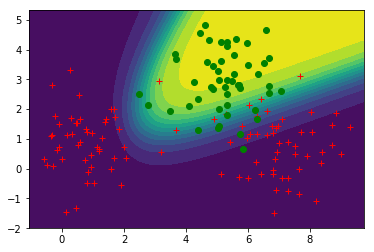

In [4]:
# Create a grid of points
px = np.arange(Xnp[:,0].min()-0.5, Xnp[:,0].max()+0.5, 0.1)
py = np.arange(Xnp[:,1].min()-0.5, Xnp[:,1].max()+0.5, 0.1)


# Use different colours for different classes
X0=Xnp[ynp==0] # Select samples for class 0
X1=Xnp[ynp==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(px,py,model,15)
